# Prediction of car sale prices based on mileage of these cars for different brands

### Importing the required libraries for data analysis

In [1]:
import pandas as pd
import numpy as np
import re
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

### 1 . Data Import

In [2]:
df = pd.read_csv(r'CarDataSet.csv')
df

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN


In [3]:
# printing the name of all columns present in the dataset
df.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price'],
      dtype='object')

Setting the unnamed column as index column
and again printing the dataset

In [4]:
df.set_index('Unnamed: 0' , inplace = True)
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
Unnamed: 0,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN


In [5]:
### to know the x and y range of dataset we print the shape of dataset
df.shape

(7253, 13)

In [6]:
### to know about the general information about the dateset we print info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 1233
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 793.3+ KB


In [7]:
### to know about the duplicated values in the dateset we print duplicated command
df[df.duplicated()].count()

Name                 1
Location             1
Year                 1
Kilometers_Driven    1
Fuel_Type            1
Transmission         1
Owner_Type           1
Mileage              1
Engine               1
Power                1
Seats                1
New_Price            0
Price                0
dtype: int64

In [8]:
# Print the total number of car brands in name column
df['Name'].value_counts()

Mahindra XUV500 W8 2WD                  55
Maruti Swift VDI                        49
Maruti Swift Dzire VDI                  42
Honda City 1.5 S MT                     39
Maruti Swift VDI BSIV                   37
                                        ..
Chevrolet Beat LT Option                 1
Skoda Rapid 1.6 MPI AT Elegance Plus     1
Ford EcoSport 1.5 TDCi Ambiente          1
Hyundai i10 Magna 1.1 iTech SE           1
Hyundai Elite i20 Magna Plus             1
Name: Name, Length: 2041, dtype: int64

In [9]:
### to know about the range of the values in the dateset we print describe command
df.describe()

,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,2013.365366,5.869906e+04,5.279722,9.479468
std,3.254421,8.442772e+04,0.811660,11.187917
min,1996.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.341600e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


### 2. Data Pre-Processing

In [10]:
# to know about the missing values in the dateset we print isnull command
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

there is only 2 values missing in Mileage column whereas in price the number of values are 1234

In case of Power and engine 46 values and for seats 53 and for new_price 6247 values are missing

In [11]:
# filling the missing values with mean values
df = df.fillna(df.mean())

<ipython-input-11-eb36536b61df>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


In [12]:
#still it has null values in engine, power and new_price
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                   0
New_Price            6247
Price                   0
dtype: int64

Still some values are missing in above column due to datatype

So first we replace some string values by removing them 

In [13]:
# by repalcing the unit values these features 
df['Mileage'] = df['Mileage'].str.replace('km/kg|kmpl','')
df['Engine'] = df['Engine'].str.replace('CC','')
df['Power'] = df['Power'].str.replace('bhp','')
df

<ipython-input-13-314d6ed860b5>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Mileage'] = df['Mileage'].str.replace('km/kg|kmpl','')


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
Unnamed: 0,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,NaN,1.750000
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,NaN,12.500000
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,8.61 Lakh,4.500000
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,NaN,6.000000
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,NaN,17.740000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598,103.6,5.0,NaN,9.479468
1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197,103.6,5.0,NaN,9.479468
1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461,63.1,5.0,NaN,9.479468


In [14]:
df['Power'].isnull().sum()

46

In [15]:
df.describe()

,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7.253000e+03,7253.000000,7253.000000
mean,2013.365366,5.869906e+04,5.279722,9.479468
std,3.254421,8.442772e+04,0.808688,10.191695
min,1996.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.850000
50%,2014.000000,5.341600e+04,5.000000,6.750000
75%,2016.000000,7.300000e+04,5.000000,9.479468
max,2019.000000,6.500000e+06,10.000000,160.000000


In [16]:
# by droping the two columns power and new_price from the dataset as they are irrelavant
df = df.drop(['Power','New_Price'], axis=1)
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,Price
Unnamed: 0,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,5.0,1.750000
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,5.0,12.500000
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,5.0,4.500000
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,7.0,6.000000
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,5.0,17.740000
...,...,...,...,...,...,...,...,...,...,...,...
1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598,5.0,9.479468
1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197,5.0,9.479468
1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461,5.0,9.479468


In [17]:
#changing the dtype of mileage and engine from obj to float
df[['Mileage']] = df[['Mileage']].astype(float)
df[['Engine']] = df[['Engine']].astype(float)
#df['Power'] = df['Power'].astype(float)

In [18]:
df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Seats,Price
count,7253.000000,7.253000e+03,7251.000000,7207.000000,7253.000000,7253.000000
mean,2013.365366,5.869906e+04,18.141580,1616.573470,5.279722,9.479468
std,3.254421,8.442772e+04,4.562197,595.285137,0.808688,10.191695
min,1996.000000,1.710000e+02,0.000000,72.000000,0.000000,0.440000
25%,2011.000000,3.400000e+04,15.170000,1198.000000,5.000000,3.850000
50%,2014.000000,5.341600e+04,18.160000,1493.000000,5.000000,6.750000
75%,2016.000000,7.300000e+04,21.100000,1968.000000,5.000000,9.479468
max,2019.000000,6.500000e+06,33.540000,5998.000000,10.000000,160.000000


In [19]:
#now replacing the their null values with mean 
df = df.fillna(df.mean())
df

<ipython-input-19-2711e108fc21>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,Price
Unnamed: 0,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,5.0,1.750000
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,5.0,12.500000
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,5.0,4.500000
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,7.0,6.000000
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,5.0,17.740000
...,...,...,...,...,...,...,...,...,...,...,...
1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,5.0,9.479468
1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,5.0,9.479468
1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,5.0,9.479468


In [20]:
df.isnull().sum()  ### Now No Null values are there in the dataset

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Seats                0
Price                0
dtype: int64

### 3. EDA Analysis

### A. Correlation coefficient

In [21]:
# finding the correlation coef
df.corr()

<ipython-input-21-7d3cd68e8992>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Year,Kilometers_Driven,Mileage,Engine,Seats,Price
Year,1.000000,-0.187859,0.322437,-0.054233,0.008137,0.279449
Kilometers_Driven,-0.187859,1.000000,-0.069122,0.094765,0.090162,-0.011318
Mileage,0.322437,-0.069122,1.000000,-0.585023,-0.305545,-0.280510
Engine,-0.054233,0.094765,-0.585023,1.000000,0.399033,0.604829
Seats,0.008137,0.090162,-0.305545,0.399033,1.000000,0.047318
Price,0.279449,-0.011318,-0.280510,0.604829,0.047318,1.000000


Highest value to correlation observed between price and engine followed by mileage and year

###  Matplotlib scatter diagrams

Plotting the scatter plot price and other features

<Axes: title={'center': 'Scatter Plot of Price vs Mileage'}, xlabel='Price', ylabel='Mileage'>

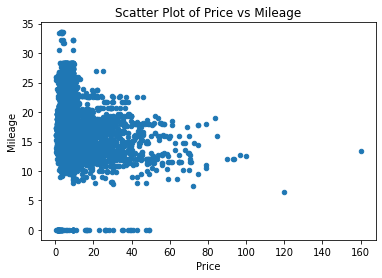

In [22]:
df.plot.scatter(x='Price', y='Mileage', title='Scatter Plot of Price vs Mileage')

<Axes: title={'center': 'Scatter Plot of Price vs Engine'}, xlabel='Price', ylabel='Engine'>

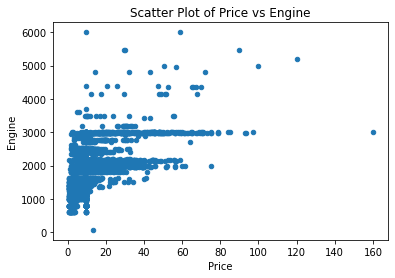

In [23]:
df.plot.scatter(x='Price', y='Engine', title='Scatter Plot of Price vs Engine')

<Axes: title={'center': 'Scatter Plot of Price vs Year'}, xlabel='Price', ylabel='Year'>

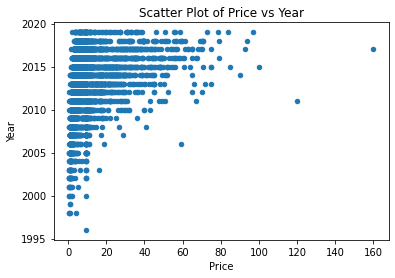

In [24]:
df.plot.scatter(x='Price', y='Year', title='Scatter Plot of Price vs Year')

Distribustion of price vs mileage scatter plot is more accurate as comapre to price and engine

plotting the pie chart for various brands of cars

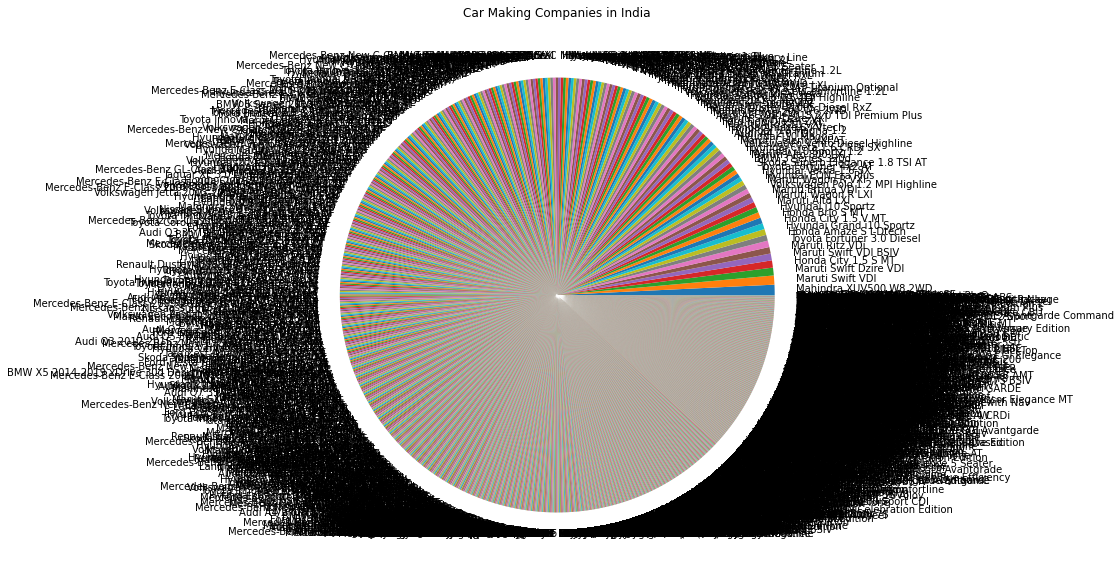

In [25]:
fig = plt.figure(figsize = (10,10))
ax = fig.subplots()
df.Name.value_counts().plot(ax=ax, kind='pie')
ax.set_ylabel("")
ax.set_title("Car Making Companies in India")
plt.show()

Text(0, 0.5, '')

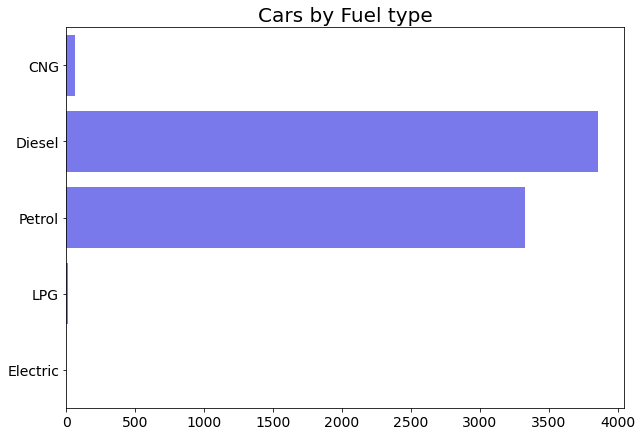

In [26]:
#plotting the graph between biffrent fuel_type cars
plt.figure(figsize=(10,7))
sns.countplot(data=df, y='Fuel_Type',alpha=.6,color='blue')
plt.title('Cars by Fuel type',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('')

More number of cars are diseal followed by petrol

In [27]:
df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Seats,Price
count,7253.000000,7.253000e+03,7253.000000,7253.000000,7253.000000,7253.000000
mean,2013.365366,5.869906e+04,18.141580,1616.573470,5.279722,9.479468
std,3.254421,8.442772e+04,4.561567,593.394164,0.808688,10.191695
min,1996.000000,1.710000e+02,0.000000,72.000000,0.000000,0.440000
25%,2011.000000,3.400000e+04,15.170000,1198.000000,5.000000,3.850000
50%,2014.000000,5.341600e+04,18.160000,1493.000000,5.000000,6.750000
75%,2016.000000,7.300000e+04,21.100000,1968.000000,5.000000,9.479468
max,2019.000000,6.500000e+06,33.540000,5998.000000,10.000000,160.000000


In [28]:
import matplotlib.pyplot as plt

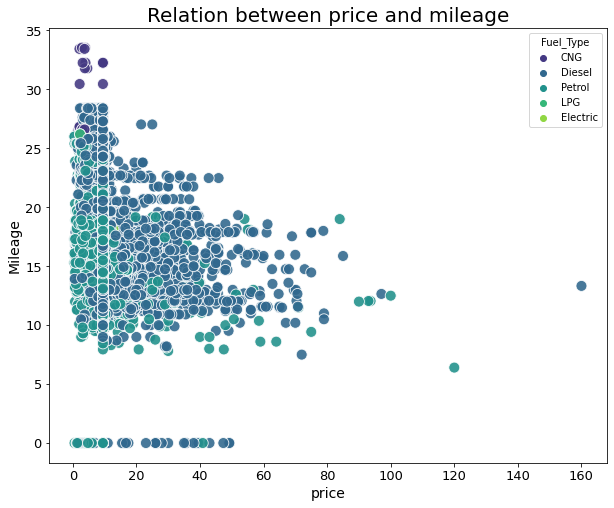

In [29]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='Price', y='Mileage',hue='Fuel_Type',palette='viridis',alpha=.89, s=120 );
plt.xticks(fontsize=13);
plt.yticks(fontsize=13)
plt.xlabel('price',fontsize=14)
plt.ylabel('Mileage',fontsize=14)
plt.title('Relation between price and mileage',fontsize=20);

### Seaborn Pairplot diagrams

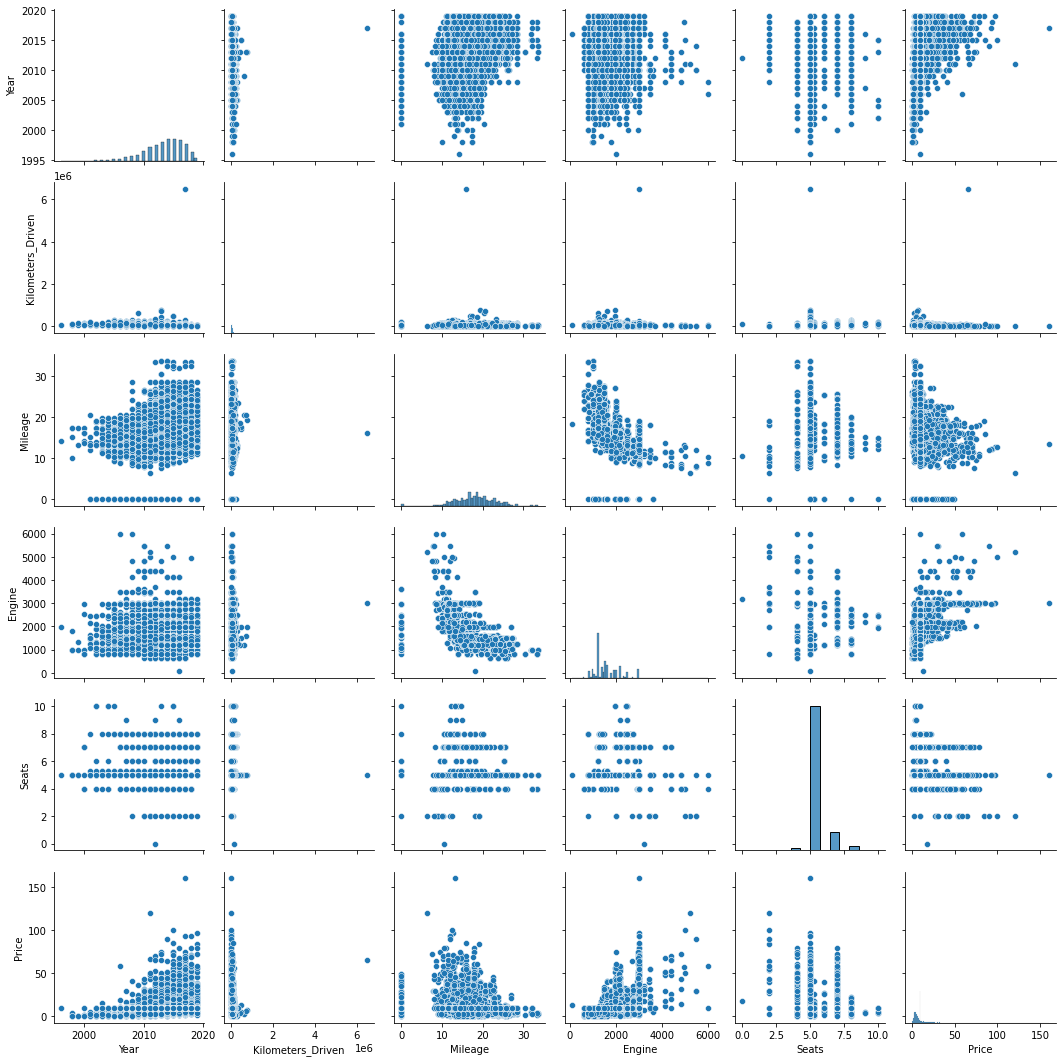

In [30]:
#plotting the scatter plots
sns.pairplot(df)

### 4 . Split the dataset into train test split format and application of simple linear regression model

Appling the linear regression model as y as price and x as mileage

In [31]:
x = df['Mileage'].values.reshape(-1,1)
y = df['Price'].values.reshape(-1,1)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
#spllitng the dataset in train and test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state =42)

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
reg = LinearRegression()

In [36]:
reg.fit(x_train, y_train)

LinearRegression()

In [37]:
#the value of intercept
reg.intercept_

array([21.00179074])

In [38]:
#the value of coef
reg.coef_

array([[-0.63628192]])

In [39]:
pred = reg.predict(x_test)

In [40]:
pred

array([[ 8.02163955],
       [ 6.24005017],
       [12.22110023],
       ...,
       [11.75661443],
       [ 7.36626917],
       [13.68454865]])

In [41]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,pred)
print('mean_sqrd_error is==',mean_squared_error(y_test,pred))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,pred)))
print('r2_score is ',score)

mean_sqrd_error is== 88.04359304359853
root_mean_squared error of is== 9.383154748995592
r2_score is  0.07486810057960291


Appling the linear regression model as y as price and x as engine

In [42]:
x1 = df['Engine'].values.reshape(-1,1)
y1 = df['Price'].values.reshape(-1,1)

In [43]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1,test_size=0.3, random_state =42)

In [44]:
reg1 = LinearRegression()

In [45]:
reg1.fit(x1_train, y1_train)

LinearRegression()

In [46]:
#the value of intercept
reg1.intercept_

array([-7.21281195])

In [47]:
#the value of coef
reg1.coef_

array([[0.01031253]])

In [48]:
pred1 = reg.predict(x1_test)

In [49]:
pred1

array([[ -740.62766873],
       [ -773.0780467 ],
       [ -869.15661677],
       ...,
       [-1120.48797558],
       [ -846.88674954],
       [-1876.39089775]])

In [50]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
# predicting the accuracy score
score=r2_score(y1_test,pred1)
print('mean_sqrd_error is==',mean_squared_error(y1_test,pred1))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y1_test,pred1)))
print('r2_score is ',score)

mean_sqrd_error is== 1161192.8845077397
root_mean_squared error of is== 1077.5866018597947
r2_score is  -12200.416840247888


### Application of Multiple linear regression model

Appling the multiple linear regression model as y as price and x as mileage, engine and year

In [51]:
X = df[['Engine', 'Mileage','Year']].values
Y = df['Price'].values.reshape(-1,1)

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state =42)

In [53]:
regression = LinearRegression()

In [54]:
regression.fit(X_train, Y_train)

LinearRegression()

In [55]:
#the value of intercept
regression.intercept_

array([-2054.75879612])

In [56]:
#the value of coef
regression.coef_

array([[ 0.01026474, -0.08071944,  1.01774108]])

In [57]:
prediction = regression.predict(X_test)

In [58]:
# importing r2_score module
from sklearn.metrics import r2_score
# predicting the accuracy score
score=r2_score(Y_test,prediction)
print('mean_sqrd_error is==',mean_squared_error(Y_test,prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(Y_test,prediction)))
print('r2_score is ',score)

mean_sqrd_error is== 47.7518732663947
root_mean_squared error of is== 6.910273024012489
r2_score is  0.4982396823134444


### Application of Polynomial transformation of 3 degree

In [59]:
from sklearn.preprocessing import PolynomialFeatures

In [60]:
poly = PolynomialFeatures(degree=3, include_bias=True)
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.fit_transform(X_test)

lr = LinearRegression()
lr.fit(X_train_trans, Y_train)
y_pred = lr.predict(X_test_trans)

In [61]:
from sklearn.metrics import r2_score
# Calculation of Mean Squared Error (MSE)
#mean_squared_error(y_test, y_prediction)
r2_score(Y_test,y_pred)

0.5729044611946756